# Statistical distributions, and the Central Limit Theorem

To understand the role of stochasticity in biology, it helps to understand basic statistical distributions. Much of this material is from [Mickey Atwal](http://nbviewer.ipython.org/url/atwallab.cshl.edu/teaching/distributions.ipynb).

In [4]:
from __future__ import division

from IPython.display import Image
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Discrete distributions

Discrete distributions work with *count* variables

$\mathbf{BINOMIAL}$:The probability of observing $n$ successes, each with a probability $p$, out of $N$ attempts.
$$
P(n;N,p)=\displaystyle \left(
\frac{N!}{n!(N-n)!}
\right)
p^n (1-p)^{N-n}
$$

* mean=$Np$, variance=$Np(1-p)$
* Example: what is the probability of getting X heads out of Y flips of a fair coin?

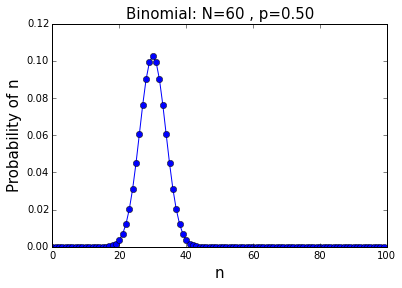

In [11]:
N=60
p=0.5
n=np.arange(0,100)
y=stats.binom.pmf(n,N,p)
plt.plot(n,y,'o-')
plt.title('Binomial: N=%i , p=%.2f' % (N,p),fontsize=15)
plt.xlabel('n',fontsize=15)
plt.ylabel('Probability of n',fontsize=15)
plt.show()

In [10]:
stats.binom.pmf(np.arange(0,10),6,.5)

array([ 0.015625,  0.09375 ,  0.234375,  0.3125  ,  0.234375,  0.09375 ,
        0.015625,  0.      ,  0.      ,  0.      ])

- You can see that on average when you toss six coins, you will get three heads. 
- However, other probabilities are also possible, though increasingly unlikely.

$\mathbf{POISSON}$: The probability of observing $n$ low-probability successes when the average number of successes is $\mu$
$$
P(n;\mu)=\frac{\mu^n e^{-\mu}}{n!}
$$

* mean=$\mu$, variance=$\mu$
* Example: What is the probability of an ?

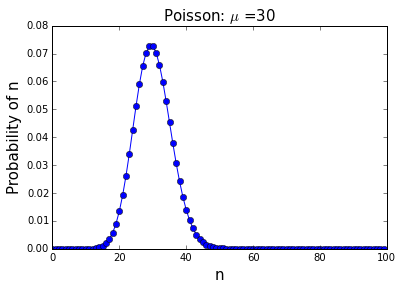

In [10]:
u=30
n=np.arange(0,100)
y=stats.poisson.pmf(n,u)
plt.plot(n,y,'o-')
plt.title('Poisson: $\mu$ =%i' % u,fontsize=15)
plt.xlabel('n',fontsize=15)
plt.ylabel('Probability of n',fontsize=15)
plt.show()

For example, here's a famous data set on the number of soilders in the Prussian cavalry killed by horse kick from 1985 - 1894
- data from *The Law of Small Numbers*, Ladislaus von Bortkiewicz (1889)

Aggregating across all 14 different cavalry corps
Variance : 0.759172
Mean : 0.692308


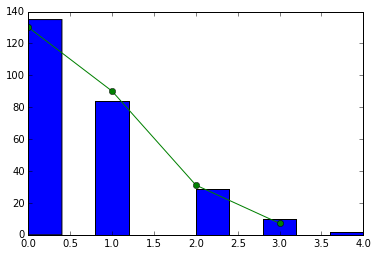

In [13]:
hk = pd.read_csv("data/HorseKicks.csv")
data = np.array(hk.ix[:,2:])
plt.hist(np.array(hk.ix[:,2:].stack()))
print "Aggregating across all 14 different cavalry corps"
print "Variance : %.6f" % data.var()
print "Mean : %.6f" % data.mean()

n=np.arange(0,4)
y=stats.poisson.pmf(n,data.mean())*data.size
plt.plot(n,y,'o-')

In [14]:
hk

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
0,1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0
5,1880,0,3,2,1,1,1,0,0,0,2,1,4,3,0
6,1881,1,0,0,2,1,0,0,1,0,1,0,0,0,0
7,1882,1,2,0,0,0,0,1,0,1,1,2,1,4,1
8,1883,0,0,1,2,0,1,2,1,0,1,0,3,0,0
9,1884,3,0,1,0,0,0,0,1,0,0,2,0,1,1


## Continuous distributions

$\mathbf{GAUSSIAN (NORMAL)}$:
$P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty]$

* mean=$\mu$, variance=$\sigma^2$
* This distribution appears as the large N limit of the binomial distribution and the Central Limit Theorem.

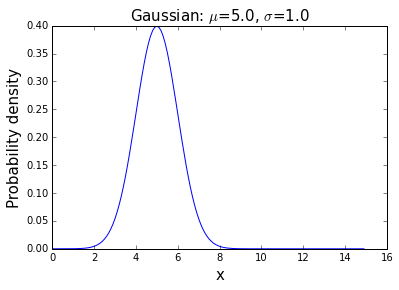

In [68]:
u=5 # mean
s=1 # standard deviation
x=np.arange(0,15,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

### Standard normal distribution

* $\mu$=0, $\sigma^2$=1


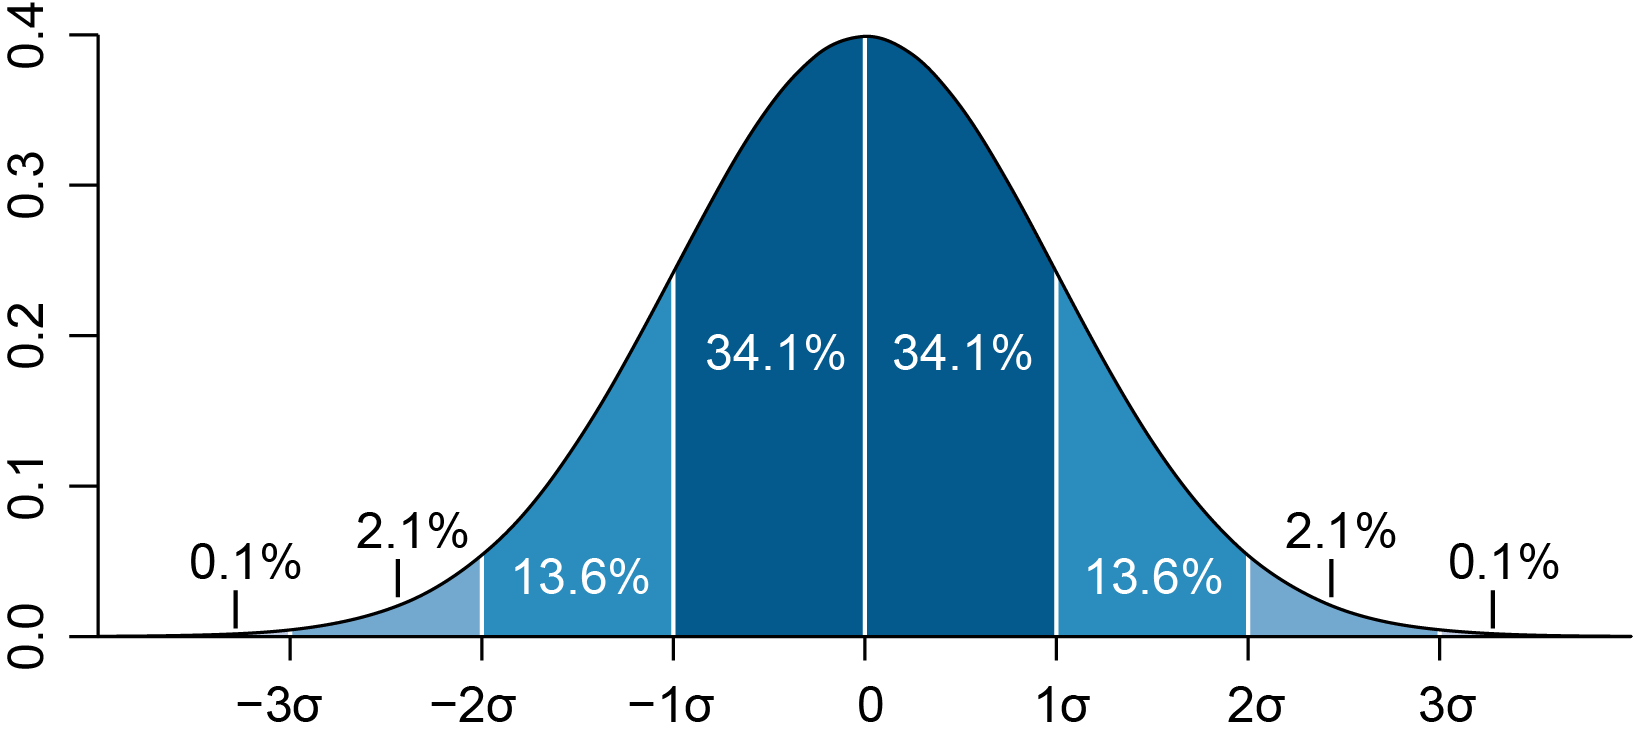

In [87]:
Image('media/Standard_deviation_diagram.png',width=800)

Events that occur with probabilities in the tail end of the distribution are considered rare. In statistics, we often consider events 'significant' if they occur less than 5% of the time
- greater than 2$\sigma$, in the normal distribution

$\mathbf{EXPONENTIAL}$:
$P(x;k)=k e^{-kx}, \hspace{1in} x \in [0,\infty], \hspace{0.1in} k>0$

* mean=$1/k$,  variance=$1/k^2$
* This distribution describes the time intervals in a homogeneous Poisson process.

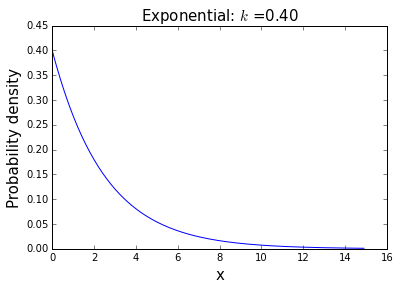

In [65]:
k=0.4
x=np.arange(0,15,0.1)
y=k*np.exp(-k*x)
plt.plot(x,y,'-')
plt.title('Exponential: $k$ =%.2f' % k,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

$\mathbf{BETA}$: $P(x;\alpha,\beta)=\displaystyle \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$, $\hspace{1in} x \in  [0;1], \hspace{0.1in} \alpha>0, \hspace{0.1in}\beta>0$

* mean=$\displaystyle \frac{\alpha}{\alpha+\beta}$, variance=$\displaystyle \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta +1)}$
* This distribution appears often in population genetics and Bayesian inference.

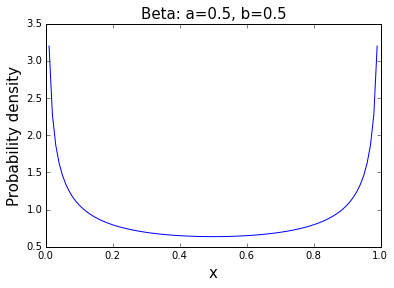

In [89]:
a=0.5
b=0.5
x=np.arange(0.01,1,0.01)
y=stats.beta.pdf(x,a,b)
plt.plot(x,y,'-')
plt.title('Beta: a=%.1f, b=%.1f' % (a,b) , fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

## Central Limit Theorem
> Take the mean of $n$ random samples from ANY arbitrary distribution with a well defined standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

Colloquially speaking, the theorem states that the average (or sum) of a set of random measurements will tend to a bell-shaped curve no matter the shape of the original meaurement distribution. This explains the ubiquity of the Gaussian distribution in science and statistics. We can demonstrate the Central Limit Thereom in Python by sampling from three different distributions: flat, exponential, and beta.

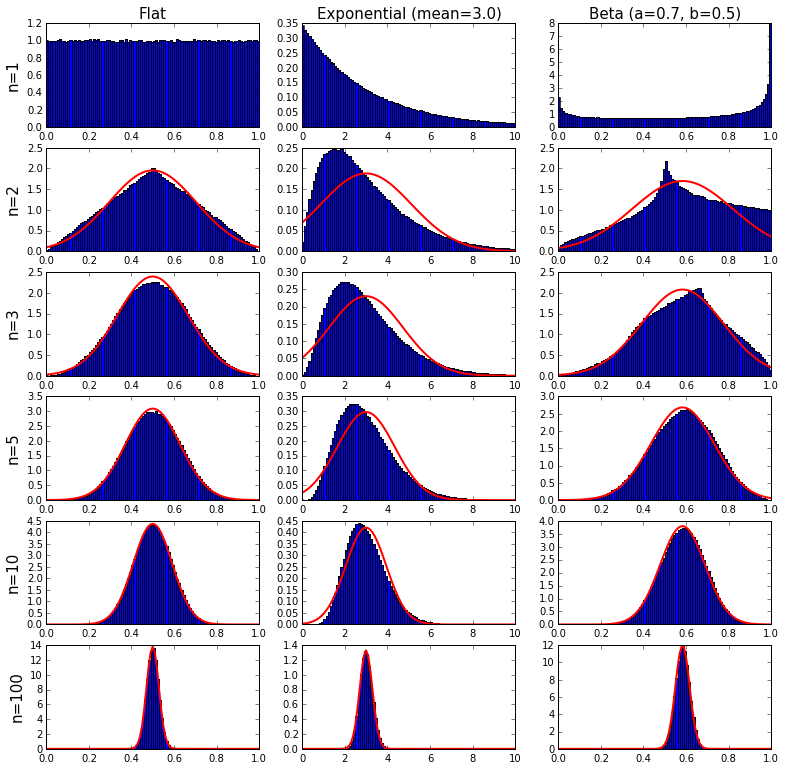

In [93]:
from functools import partial # provides capability to define function with partial arguments

N=1000000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in xrange(ln): # loop over number of n samples to average over
    for j in xrange(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'r',linewidth=2)     
plt.show()

## Why is this important?

- In biology we often want to test whether two groups are different from each other. 
- Let's say, we want to find out whether men or women differ in height. 
- We can't measure *all* the men and women.
- However, we can measure random samples from each distribution
- The Central Limit Theorem tells us that such samples will be approximately normally distributed, and a lot of statistical tests make this assumption

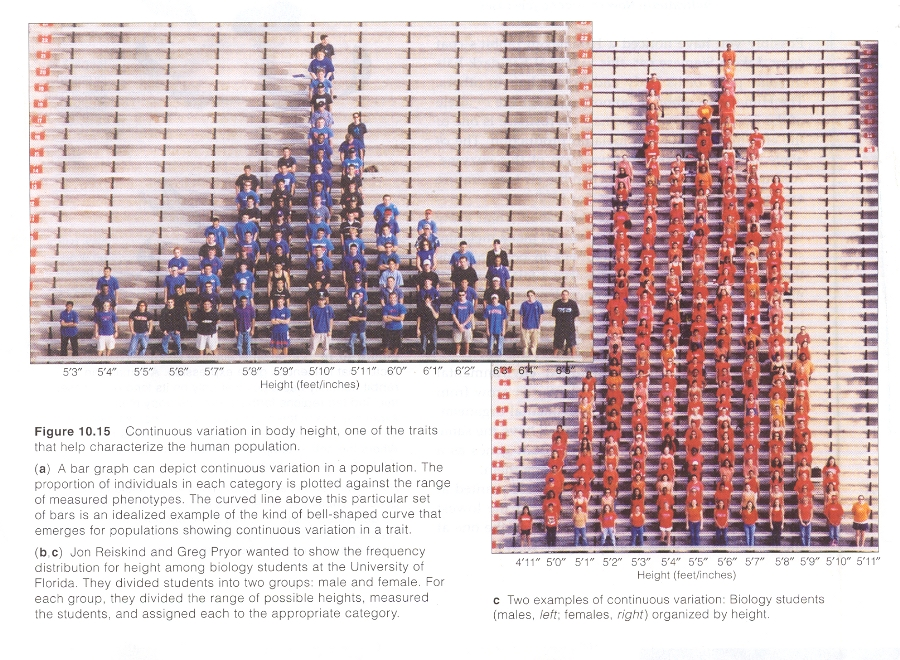

In [95]:
Image('media/Freq_Dist_Height.jpg')

How are these distributions different? What might be the reason?

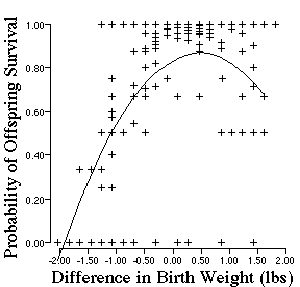

In [97]:
Image('media/human birth.png')